In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Creatomh our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Display the row's' columns and data in dictionary format for
# Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2210ae8e20>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [10]:
# Display the row's column and data in dictionary format for 
# Station table
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2210b30670>,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

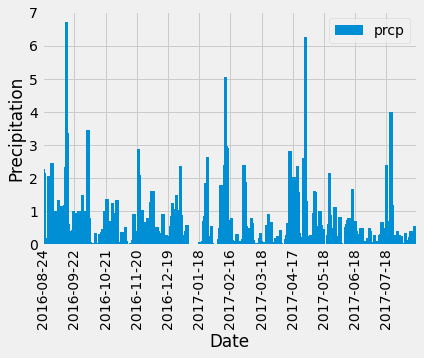

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
  #since latest date is 2017-08-23, date one year from last date should be 
    # 2016-08-23

# Perform a query to retrieve the data and precipitation scores
prcp_1yr = session.query(Measurement.date, Measurement.prcp).\
             filter(Measurement.date >'2016-08-23').\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_1yr, columns = ['date', 'prcp'])
prcp_df=prcp_df.fillna(0)
# prcp_df = prcp_df.groupby("date").sum()
prcp_df=prcp_df.set_index("date" )



# Sort the dataframe by date

prcp_df = prcp_df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar(width = 20)
# plt.tight_layout()
plt.locator_params(nbins = 12)

plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.savefig("Images/Precipitation.png")

plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
no_of_station = session.query(Station.station).count()
print(f" The total number of statioin is {no_of_station}")


 The total number of statioin is 9


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# .group_by(Station.station).count()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.tobs).first()
print(f"lowest temperature at the station was {lowest_temp}")

highest_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.tobs.desc()).first()
print(f"Highest temperature at the station was {highest_temp}")

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(f"Average temperature at the station was {avg_temp}")

lowest temperature at the station was (54.0,)
Highest temperature at the station was (85.0,)
Average temperature at the station was [(71.66378066378067,)]


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_1yr = session.query(Measurement.date, Measurement.tobs).\
             filter(Measurement.date >'2016-08-23').\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
active_df = pd.DataFrame(active_1yr, columns = ['date', 'Temperature'])

active_df=active_df.set_index("date" )
active_df.head()

,Temperature
date,
2016-08-24,79.0
2016-08-24,76.0
2016-08-24,80.0
2016-08-24,78.0
2016-08-24,79.0


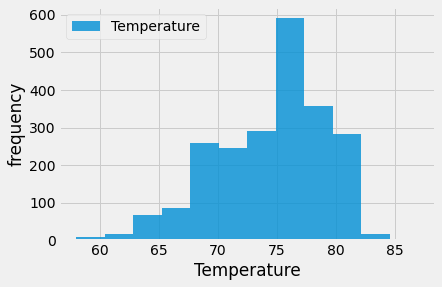

In [18]:
#Plotting the temperature data for most active station using histogram
ax = active_df.plot.hist(bins=12, alpha=0.8)
plt.xlabel("Temperature")
plt.ylabel("frequency")
plt.savefig("Images/Temperature.png")

# Close session

In [27]:

    #create session link from python to the database
  
    #"""Return list of precipitation values along with corresponding dates."""
    #query the precipitaiton values with corresponding date
    prcp_results = session.query(Measurement.date,Measurement.prcp).order_by(Measurement.date.desc()).all()

    
    #creating dictionary for dates and precipitation values
    precipitation_values = []
    
    for date, prcp in prcp_results:
        prcp_dict = {}
        prcp_dict["date"] = date
        prcp_dict["prcp"] = prcp
        precipitation_values.append(prcp_dict)
        

precipitation_values

[{'date': '2017-08-23', 'prcp': 0.0},
 {'date': '2017-08-23', 'prcp': 0.0},
 {'date': '2017-08-23', 'prcp': 0.08},
 {'date': '2017-08-23', 'prcp': 0.45},
 {'date': '2017-08-22', 'prcp': 0.0},
 {'date': '2017-08-22', 'prcp': 0.0},
 {'date': '2017-08-22', 'prcp': 0.5},
 {'date': '2017-08-21', 'prcp': 0.0},
 {'date': '2017-08-21', 'prcp': 0.02},
 {'date': '2017-08-21', 'prcp': None},
 {'date': '2017-08-21', 'prcp': 0.56},
 {'date': '2017-08-20', 'prcp': 0.0},
 {'date': '2017-08-20', 'prcp': 0.01},
 {'date': '2017-08-20', 'prcp': None},
 {'date': '2017-08-19', 'prcp': 0.0},
 {'date': '2017-08-19', 'prcp': 0.0},
 {'date': '2017-08-19', 'prcp': None},
 {'date': '2017-08-19', 'prcp': 0.09},
 {'date': '2017-08-18', 'prcp': 0.0},
 {'date': '2017-08-18', 'prcp': 0.0},
 {'date': '2017-08-18', 'prcp': 0.06},
 {'date': '2017-08-18', 'prcp': None},
 {'date': '2017-08-17', 'prcp': 0.0},
 {'date': '2017-08-17', 'prcp': 0.05},
 {'date': '2017-08-17', 'prcp': 0.01},
 {'date': '2017-08-17', 'prcp': 0.13}

In [19]:
# Close Session
session.close()